# 线性回归
  
某城市的电网系统需要升级，以应对日益增长的用电需求。电网系统需要考虑最高温度对城市的峰值用电量的影响。项目负责人需要预测明天城市的峰值用电量，他搜集了以往的数据。现在，负责人提供了他搜集到的数据，并请求你帮他训练出一个模型，这个模型能够很好地预测明天城市的峰值用电量。

## 1- 准备

先导入必要的python包

In [107]:
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline

导入负责人提供的数据，并可视化数据

X shape: (80, 1)
Y shape: (80, 1)
some X[:5]: [[37.24]
 [37.53]
 [33.92]
 [26.59]
 [20.05]]
some Y[:5]: [[4.04]
 [2.84]
 [3.2 ]
 [3.42]
 [2.32]]


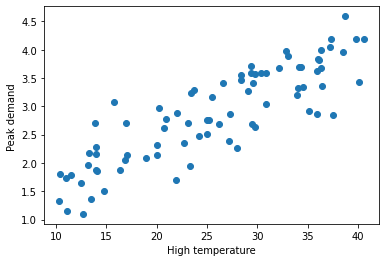

In [113]:
data = np.loadtxt('/content/drive/MyDrive/data.txt')
#data 第一列为温度信息 第二列为人口信息
X = data[:,0].reshape(-1,1)
#data 第三列为用电量信息
Y = data[:,2].reshape(-1,1)
plt.xlabel('High temperature')
plt.ylabel('Peak demand ')
plt.scatter(X,Y)
print('X shape:',X.shape)
print('Y shape:',Y.shape)
print('some X[:5]:',X[:5])
print('some Y[:5]:',Y[:5])

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2- 单变量线性回归

你决定使用回归算法来训练一个模型，用来预测明天城市的峰值用电量。

### 单变量线性回归模型表示
$$Peak\ demand \approx \theta_0 + \theta_1 \cdot (High\ temperature)$$
![functions](images/lines.jpg)
单变量线性回归的模型由两个参数$\theta_0$,$\theta_1$来表示一条直线。我们的目标也就是找到一个"最符合"的直线或者说参数$\theta_i$如何选择。

设输入的特征——最高温度(F)为$x^{(i)} \in \mathbb{R}^{n+1}$，$i=1,\cdots,m$。$m$为样本总数，在该例子中为**$m=80$**。$n$为特征的个数，这里为$1$。
$$
x^{(i)} \in \mathbb{R}^2 = \begin{bmatrix} 1 \\ \text{high temperature for day i} \end{bmatrix}
$$

设输出为$y^{(i)} \in \mathbb{R}$，表示第$i$天的峰值用电量。

参数为$\theta \in \mathbb{R}^{n+1} = \begin{bmatrix} \theta_0 \\ \theta_1 \\ \vdots \\ \theta_n \end{bmatrix}$

在该例子中，模型应该为一条直线，假设模型为：
$$h_{\theta}(x) = \theta^T x = \theta_0 + \theta_1 x $$
**注意**：这里的$\theta^T$是一个向量，$\theta_0,\theta_1$是标量。使用向量化的表示原因（1）简化数学公式的书写（2）与程序代码中的表示可以一致，使用向量化的代码表示可以加速运算，因此一般能不用`for`循环的地方都不用`for`循环。 

下面一个简单的例子说明向量化的代码运算更快  


In [78]:
# 随机初始化两个向量，计算它们的点积
x = np.random.rand(10000000,1)
y = np.random.rand(10000000,1)
ans = 0
start = time.time()
for i in range(10000000):
    ans += x[i,0]*y[i,0]
end = time.time()
print('for循环的计算时间%.2fs'%(end - start))
print('计算结果：%.2f'%(ans))
start = time.time()
ans = np.dot(x.T,y)
end = time.time()
print('向量化的计算时间%.2fs'%(end - start))
print('计算结果：%.2f'%(ans))

for循环的计算时间8.03s
计算结果：2498917.85
向量化的计算时间0.01s
计算结果：2498917.85



因为$\theta_0 + \theta_1 x=\begin{bmatrix} \theta_0 \quad \theta_1 \end{bmatrix} \begin{bmatrix} 1 \\ x \end{bmatrix} $
因此，为了方便编程，我们需要给每一个$x^{(i)}$的前面再加一行1。使得每一个$x^{(i)}$成为了一个2维向量

### 预测结果

模型需要根据输入自变量 $x^{(i)}$ 和参数 $\theta$ 来预测可能的产生的 $predict\_y^{(i)}$

直接将自变量 $x^{(i)}$ 作为模型的输入，而模型自动根据输入和当前参数 $\theta$ 输出预测结果：

$$
predict\_y^{(i)} = h_\theta(x^{(i)})
$$

其中 $h_\theta(x^{(i)})$ 为模型在参数为 $\theta$ 情况下，对于输入 $x^{(i)}$的预测函数。

$predict\_y^{(i)}$ 为当前情况下模型根据输入而做出的预测

在预测阶段，$x$ 作为自变量


### 损失函数

模型的预测结果和实际结果有差距，为了衡量它们之间的差距，或者说使用这个模型产生的损失，我们定义损失函数$l(predict\_y^{(i)}, y^{(i)})$。这里我们使用平方损失：
$$
l(predict\_y, y) = \left ( predict\_y^{(i)} - y^{(i)} \right )^2
$$

上述损失函数表示一个样本的损失，整个训练集的损失使用$J(\theta)$表示：
$$
\begin{aligned}
J(\theta) & = \frac{1}{2m} \sum_{i=1}^{m}l(predict\_y^{(i)}, y^{(i)}) \\
& = \frac{1}{2m} \sum_{i=1}^{m} \left ( h_\theta(x^{(i)}) - y^{(i)} \right )^2 \\
& = \frac{1}{2m} \sum_{i=1}^{m} \left ( \theta^T x^{(i)} - y^{(i)} \right )^2
\end{aligned}
$$
（其中数字2的作用是方便求导时的运算）

为了使模型的预测效果好，需要最小化训练集上的损失，$\underset{\theta}{\text{minimize}} J(\theta)$。

在损失阶段，$\theta$ 作为自变量


### 梯度下降法

为了得到使得损失函数$J(\theta)$最小化的$\theta$，可以使用梯度下降法。

损失函数$J(\theta)$的函数图像如下
![损失函数J](images/loss_function_j.png)

损失函数$J(\theta)$关于参数向量$\theta$中的一个参数比如$\theta_1$的函数图是
![theta-J 函数图](images/theta-J.png)

假设一开始$J(\theta)$的值在紫色点上，为了降低$J(\theta)$值，需要$\theta_1$往右变移动，这个方向是$J(\theta)$在$\theta_1$上的负梯度。只要$\theta$不断往负梯度方向移动，$J(\theta)$一定可以降到最低值。梯度下降法就是使参数$\theta$不断往负梯度移动，经过有限次迭代(更新$\theta$值)之后，损失函数$J(\theta)$达到最低值。

梯度下降法的过程：
1. 初始化参数向量$\theta$。

2. 开始迭代

   A.根据实际输入$x$和参数$\theta$预测输出，
   
   B. 根据预测输出值和实际输出值之间的差距，计算损失函数$J(\theta)$，
   
   C. 计算$\theta$的梯度，
   
   D. 更新参数$\theta$。



现在，我们开始实现 Regression 学习算法。

**任务1：** 首先在$X$前面加上一列1，表示参数$\theta_0$的系数，方便运算。$X$是形状为$(m,1)$的矩阵，一共$m$行数据，我们需要为每一行数据的前面加一列1，也就是像这样  
$$
\begin{bmatrix} x^{(0)} \\ x^{(1)} \\ \vdots \\x^{(m-1)}  \end{bmatrix} \longrightarrow
\begin{bmatrix} 1\quad x^{(0)} \\ 1\quad x^{(1)} \\ \vdots \\ 1\ x^{(m-1)}  \end{bmatrix}
$$
提示：可以使用`np.hstack`把两个矩阵水平合在一起。用1初始化向量或矩阵的函数是`np.ones`。(函数详情使用python的帮助函数`help`，比如`help(np.ones)`，或者百度。)

In [114]:
def preprocess_data(X):
    """输入预处理 在X前面加一列1
    参数：
        X:原始数据，shape为 mx1
    返回：
        X_train: 在X加一列1的数据，shape为 mx2
    """

    m = X.shape[0]   # m 是数据X的行数
    ### START CODE HERE ###
    
    X_train = np.hstack((np.array(np.ones(m))[:, np.newaxis],X))
    
    ### END CODE HERE ###
    return X_train

In [115]:
X = preprocess_data(X)
print('new X shape:',X.shape)
print('Y shape:',Y.shape)
print('new X[:10,:]=',X[:5,:])
print('Y[:10,:]=',Y[:5,:])

new X shape: (80, 2)
Y shape: (80, 1)
new X[:10,:]= [[ 1.   37.24]
 [ 1.   37.53]
 [ 1.   33.92]
 [ 1.   26.59]
 [ 1.   20.05]]
Y[:10,:]= [[4.04]
 [2.84]
 [3.2 ]
 [3.42]
 [2.32]]


**任务2：** 接着，初始化参数向量$\theta$。$\theta$的shape是$(2,1)$，我们随机初始化$\theta$。

提示：numpy的随机函数是`np.random.rand`。

In [116]:
def init_parameter(shape):
    """初始化参数
    参数：
        shape: 参数形状
    返回：
        theta_init: 初始化后的参数
    
    """
    np.random.seed(0)
    m, n = shape
    ### START CODE HERE ###
    theta_init = np.random.rand(m,n)

    ### END CODE HERE ###
    
    return theta_init

In [117]:
theta = init_parameter((2,1))
print('theta shape is ',theta.shape)
print('theta = ',theta)

theta shape is  (2, 1)
theta =  [[0.5488135 ]
 [0.71518937]]


**任务3：**通过已知 $X$ 和参数 $\theta$ 计算预测的 $predict\_Y$ 值。由于使用`for`循环单独计算每个预测值效率不高，因此我们需要用向量化的方法去掉`for`循环。

$X$ 大小为$m \times (n+1)$($n$表示特征数量，对于这里$n=1$)，每行是一条样本特征向量，$\theta$ 大小为$(n+1) \times 1$，可以使用$X \theta$计算所有样本的预测结果,大小为$m\times 1$

这里的线性模型就可以表示为
$$
h_{\theta}(X) = X \theta
$$， 这里$h_{\theta}(X)$的大小为$m \times 1$，结果上等于 $predict\_Y_\theta$

**提示：**矩阵相乘 `np.dot(矩阵1，矩阵2)`

In [118]:
def compute_predict_Y(X,theta):
    ### START CODE HERE ###
    predictY = np.dot(X,theta) 
    ### END CODE HERE ###
    return predictY
predict_Y = compute_predict_Y(X,theta)
print(predict_Y[:5])

[[27.18246551]
 [27.38987042]
 [24.80803681]
 [19.56569876]
 [14.8883603 ]]


**任务4：** 实现计算损失函数$J(\theta)$的函数。   
从公式$$
\begin{aligned}
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left ( predict\_y_\theta^{(i)} - y_\theta^{(i)} \right )^2
\end{aligned}
$$
我们可以看到有个求和。由于使用`for`循环效率不高，因此我们需要用向量化的方法去掉`for`循环。接着$(predict\_Y - Y)^2$计算所有样本的损失值，最后求和并除以$2m$得到$J(\theta)$的值。因此，，$J(\theta)$应该是一个标量   
提示：矩阵乘法运算可使用`np.dot`函数，平方运算可使用`np.power(data, 2)`函数，求和运算可使用`np.sum`。

In [119]:
def compute_J(predict_Y, Y):
    """计算损失函数J
    参数：
        X: 训练集数据特征，shape: (m, 2)
        Y: 训练集数据标签，shape: (m, 1)
        theta: 参数，shape: (2, 1)
        
    返回：
        loss: 损失值
    """
    
    m = Y.shape[0]
    
    ### START CODE HERE ###
    

    loss = np.sum(np.power(np.subtract(predict_Y,Y),2))/(2*m)
    
    ### END CODE HERE ###
    
    return  loss

In [120]:
first_loss = compute_J(predict_Y, Y)
print("first_loss = ", first_loss)

first_loss =  144.24776230557214


**任务5**:计算参数$\theta$的梯度。  
$$
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} \left ( \theta^T x^{(i)} - y \right ) x_j^{(i)}
$$
向量化公式为
$$
\text{gradients} =\frac{1}{m} X^T (X \theta - Y) 
$$
提示：矩阵A的转置表示为`A.T`

In [121]:
def compute_gradient(predict_Y, Y):
    """计算参数theta的梯度值
    参数：
        X: 训练集数据特征，shape: (m, 2)
        Y: 训练集数据标签，shape: (m, 1)
        theta: 参数，shape: (2, 1)
        
    返回：
        gradients: theta的梯度列表 shape:(2,1)
    """
    
    m = X.shape[0]
    gradients = None
    
    ### START CODE HERE ###
   
    gradients = np.dot(X.T,np.subtract(np.dot(X,theta),Y))
    gradients /= m

    ### END CODE HERE ###
    
    return gradients

In [122]:
gradients_first = compute_gradient(predict_Y, Y)
print("gradients_first shape : ", gradients_first.shape)
print("gradients_first = ", gradients_first)


gradients_first shape :  (2, 1)
gradients_first =  [[ 16.01688437]
 [460.53440708]]


**任务6**:用梯度下降法更新参数$\theta$  

**提示**:parameters = $\theta$ - $learning\_rate·gradients$

实现`update_parameters`函数。

In [123]:
def update_parameters(theta, gradients, learning_rate=0.01):
    """更新参数theta
    参数：
        theta: 参数，shape: (2, 1)
        gradients: 梯度，shape: (2, 1)
        learning_rate: 学习率，默认为0.01
        
    返回：
        parameters: 更新后的参数
    """
    ### START CODE HERE ###

    parameters = np.subtract(theta,learning_rate*gradients)
    ### END CODE HERE ###
    
    return parameters

In [124]:
theta_one_iter = update_parameters(theta, gradients_first, 0.01)

print("theta_one_iter = ", theta_one_iter)

theta_one_iter =  [[ 0.38864466]
 [-3.8901547 ]]


**任务7**：将前面定义的函数整合起来，实现完整的模型训练函数。迭代更新$\theta$ `iter_num`次。迭代次数参数`iter_num`也是一个超参数，如果`iter_num`太小，损失函数$J(\theta)$还没有收敛；如果`iter_num`太大，损失函数$J(\theta)$早就收敛了，过多的迭代浪费时间。

In [125]:
def model(X, Y, theta, iter_num = 100, learning_rate=0.0001):
    """梯度下降函数
    参数：
        X: 训练集数据特征，shape: (m, n+1)
        Y: 训练集数据标签，shape: (m, 1)
        iter_num: 梯度下降的迭代次数
        theta: 初始化的参数，shape: (n+1, 1)
    返回：
        loss_history: 每次迭代的损失值
        theta_history: 每次迭代更新后的参数
        theta: 训练得到的参数
    """
    
    loss_history = []
    theta_history = []
    
    for i in range(iter_num):
        
        ### START CODE HERE ###
        # 预测
        predict_Y = compute_predict_Y(X,theta)
        # 计算损失
        loss = compute_J(predict_Y, Y)
        # 计算梯度
        gradients = compute_gradient(predict_Y, Y)
        # 更新参数
        theta = update_parameters(theta, gradients, learning_rate)
        ### END CODE HERE ###
        
        loss_history.append(loss)
        theta_history.append(theta)
    
    return loss_history, theta_history, theta

theta =  [[0.52638987]
 [0.0704412 ]]
loss =  0.35305686809016384


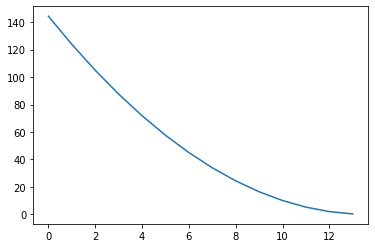

In [126]:
# 尝试不同的学习率和迭代次数
# 提交作业之前要把学习效率改为0.0001，然后重新运行一遍

loss_history, theta_history, theta = model(X, Y, theta, 14, learning_rate=0.0001)

print("theta = ", theta)

plt.plot(loss_history)
print("loss = ", loss_history[-1])

下面是学习到的线性模型与原始数据的关系

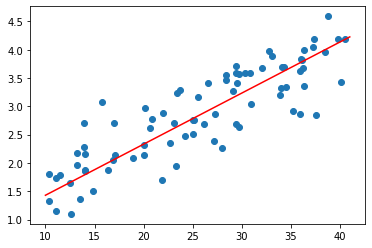

In [48]:
plt.scatter(X[:,1],Y)
x = np.arange(10,42)
plt.plot(x,x*theta[1][0]+theta[0][0],'r')

现在直观地了解一下梯度下降的过程。

(50, 50)
(50, 50)
(80, 1)
(50, 50)


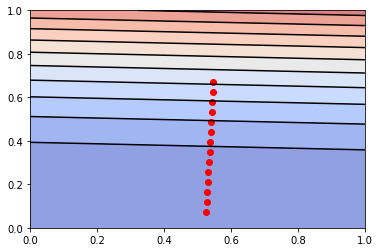

In [127]:
theta_0 = np.linspace(0, 1, 50)
theta_1 = np.linspace(0, 1, 50)
theta_0, theta_1 = np.meshgrid(theta_0,theta_1)
J = np.zeros_like(theta_0)
predict_Ys = np.zeros_like(predict_Y)
print(theta_0.shape)
print(theta_1.shape)
print(predict_Ys.shape)
print(J.shape)

for i in range(50):
    for j in range(50):
        predict_Y = compute_predict_Y(X, np.array([[theta_0[i,j]],[theta_1[i,j]]]))
        J[i,j] = compute_J(predict_Y, Y)

plt.contourf(theta_0, theta_1, J, 10, alpha = 0.6, cmap = plt.cm.coolwarm)
C = plt.contour(theta_0, theta_1, J, 10, colors = 'black')

# 画出损失函数J的历史位置
history_num = len(theta_history)
theta_0_history = np.zeros(history_num)
theta_1_history = np.zeros(history_num)
for i in range(history_num):
    theta_0_history[i],theta_1_history[i] = theta_history[i][0,0],theta_history[i][1,0]
plt.scatter(theta_0_history, theta_1_history, c="r")

可以看到，$J(\theta)$的值不断地往最低点移动。在y轴，$J(\theta)$下降的比较快，在x轴，$J(\theta)$下降的比较慢。

## 多变量线性回归
上述例子时单变量回归的例子，样本的特征只有一个一天的最高温度。负责人进过分析后发现，城市一天的峰值用电量还与城市人口有关系，因此，他在回归模型中添加城市人口变量$x_2$，你的任务是训练这个多变量回归方程：
$$
h(x) = \theta^T x = \theta_0 * 1 + \theta_1 * x_1 + \theta_2 * x_2
$$
之前实现的梯度下降法使用的对象是$\theta$和$X$向量，所示实现的梯度下降函数适用单变量回归和多变量回归。这里可以看到使用向量化的公式在多变量回归里依然不变，因此代码也基本一样,直接调用前面实现的函数即可。

**任务8：** 现在，训练一个多变量回归模型。

theta =  [[0.63188325]
 [0.03832053]
 [0.87548616]]
loss =  0.23842066366606202


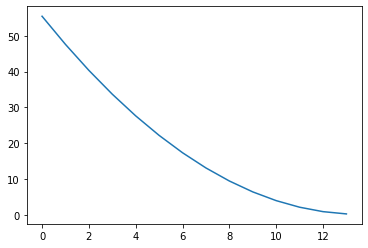

In [132]:
#读取数据，X的前两列
X = data[:,0:2].reshape(-1, 2)
Y = data[:,2].reshape(-1, 1)

### START CODE HERE ###

# 同样为X的前面添加一列1,使得X的shape从100x2 -> 100x3
X = np.hstack((np.array(np.ones(X.shape[0]))[:, np.newaxis],X))
# 初始化参数theta ,theta的shape应为 3x1
theta = np.random.rand(3,1)
#传入模型训练 learning_rate设为0.0001
loss_history, theta_history, theta = model(X, Y, theta, 14,learning_rate=0.0001)

### END CODE HERE ###
print("theta = ", theta)

plt.plot(loss_history)
print("loss = ", loss_history[-1])

## 特征归一化

特征归一化可以确保特征在相同的尺度，加快梯度下降的收敛过程。

**任务9：** 对数据进行零均值单位方差归一化处理。零均值单位方差归一化公式：
$$
x_i = \frac{x_i - \mu_i}{\sigma_i}
$$
其中$i$表示第$i$个特征，$\mu_i$表示第$i$个特征的均值，$\sigma_i$表示第$i$个特征的标准差。进行零均值单位方差归一化处理后，数据符合标准正态分布，即均值为0，标准差为1。  
**注意**，使用新样本进行预测时，需要对样本的特征进行相同的缩放处理。

提示：求特征的均值，使用numpy的函数`np.mean`，求特征的标准差，使用numpy的函数`np.std`，需要注意对哪个维度求均值和标准差。比如，对矩阵A对每一行求均值`np.mean(A,axis=0)`

mu =  [25.6295  1.131 ]
sigma =  [8.87483055 0.3606716 ]
theta =  [[ 2.861875  ]
 [ 0.15111373]
 [-0.38627975]]
loss =  0.3398955533251401


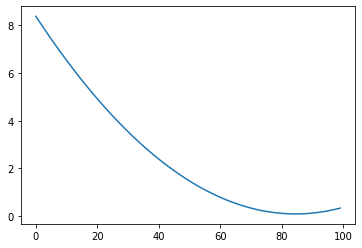

In [133]:
X = data[:,0:2].reshape((-1, 2))
Y = data[:,2].reshape((-1, 1))

### START CODE HERE ###

# 计算特征的均值 mu
mu = np.mean(X,axis=0)
# 计算特征的标准差 sigma
sigma = np.std(X,axis=0)
# 零均值单位方差归一化
X_norm = (X-mu)/sigma

### END CODE HERE ###

# 训练多变量回归模型
# X_norm前面加一列1
X = preprocess_data(X_norm)

theta = np.array([3,3,3]).reshape(3,1)#init_parameter((3,1))

# 学习率使用0.01
loss_history, theta_history, theta = model(X, Y, theta, learning_rate=0.01)



print("mu = ", mu)
print("sigma = ", sigma)

print("theta = ", theta)

plt.plot(loss_history)
print("loss = ", loss_history[-1])

我们来直观地了解特征尺度归一化的梯度下降的过程。这里只展示单变量回归梯度下降过程。

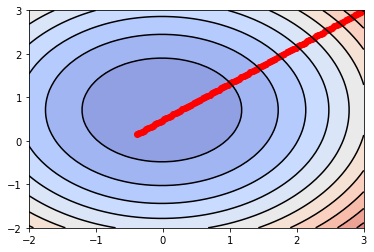

In [134]:
X_show = X[:,0:2]
X_show = preprocess_data(X_show)

theta_0 = np.linspace(-2, 3, 50)
theta_1 = np.linspace(-2, 3, 50)
theta_0, theta_1 = np.meshgrid(theta_0,theta_1)
J = np.zeros_like(theta_0)

for i in range(50):
    for j in range(50):
        predict_Y = compute_predict_Y(X_show, np.array([[2.877],[theta_0[i,j]],[theta_1[i,j]]]))
        J[i,j] = compute_J(predict_Y, Y)

plt.contourf(theta_0, theta_1, J, 10, alpha = 0.6, cmap = plt.cm.coolwarm)
C = plt.contour(theta_0, theta_1, J, 10, colors = 'black')

# 画出损失函数J的历史位置
history_num = len(theta_history)
theta_0_history = np.zeros(history_num)
theta_1_history = np.zeros(history_num)
for i in range(history_num):
    theta_0_history[i],theta_1_history[i] = theta_history[i][2,0],theta_history[i][1,0]
plt.scatter(theta_0_history, theta_1_history, c="r")

可以看到，$J(\theta)$的值不断地往最低点移动。与没有进行特征尺度归一化的图相比，归一化后，每个维度的变化幅度大致相同，这有助于$J(\theta)$的值快速下降到最低点。

## 正规方程

对于求函数极小值问题，可以使用求导数的方法，令函数的导数为0，然后求解方程，得到解析解。正规方程正是使用这种方法求的损失函数$J(\theta)$的极小值，而线性回归的损失函数$J(\theta)$是一个凸函数，所以极小值就是最小值。

正规方程的求解过程就不详细推导了，正规方程的公式是：
$$
\theta = (X^T X)^{-1} X^T Y
$$

如果$m \le n +1$，那么$X^T X$是奇异矩阵，即$X^T X$不可逆。
$X^T X$不可逆的原因可能是：

- 特征之间冗余，比如特征向量中两个特征是线性相关的。
- 特征太多，删去一些特征再进行运算。

正规方程的缺点之一就是$X^T X$不可逆的情况，可以通过正则化的方式解决。另一个缺点是，如果样本的个数太多，特征数量太多($n \gt 10000$)，正规方程的运算会很慢（求逆矩阵的运算复杂）。

**任务10：** 下面来实现正规方程。
提示：Numpy 求逆矩阵的函数是`np.linalg.inv`。

In [135]:
def normal_equation(X, Y):
    """正规方程求线性回归方程的参数 theta
    参数：
        X: 训练集数据特征，shape: (m, n+1)
        Y: 训练集数据标签，shape: (m, 1)
    返回：
        theta: 线性回归方程的参数
    """
    
    ### START CODE HERE ###
        
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),Y)

    ### END CODE HERE ###
    
    return theta

In [136]:
theta = normal_equation(X, Y)

print("theta = ", theta)

theta =  [[2.861875  ]
 [0.70215497]
 [0.0417454 ]]


恭喜，你已经帮助项目负责人计算出了一个线性模型。

**任务11：** 假设明天的最高温度是$x_1 = 40$°C，人口$x_2 = 3.3$百万，使用通过正规方程计算得到的$\theta$预测明天的城市的峰值用电量（单位：GW）吧！  
**注意**，$x$要进行同样的特征尺度归一化处理。

In [138]:
def predict(theta,x):
    
    ### START CODE HERE ###
    # 零均值单位方差归一化
    X = data[:,0:2].reshape((-1, 2))
    Y = data[:,2].reshape((-1, 1))

    mu = np.mean(X,axis=0)
    sigma = np.std(X,axis=0)

    x = (X-mu)/sigma

    # 在x前面加一列
    x = preprocess_data(x)
    #预测
    prediction = compute_predict_Y(x,theta)
    ### END CODE HERE ###

    return prediction

x = np.array([[40,3.3]])
print('预计明天的峰值用电量为：%.2f GW'%(predict(theta,x)[0])) 

预计明天的峰值用电量为：3.72 GW


以上都是线性模型，当我们数据的特征$X$与$Y$的关系没有明显的线性关系，而且又找不到合适的映射函数时，可以尝试多项式回归。
下面导入另一组最高气温与用电量数据，我们用线性模型试一试看看效果发现并不太好。

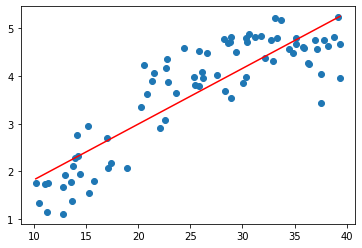

In [140]:
data1 = np.loadtxt('/content/drive/MyDrive/data1.txt')
X = data1[:,0].reshape(-1,1)
Y = data1[:,1].reshape(-1,1)

plt.scatter(X,Y)
X = np.hstack((np.ones((X.shape[0],1)),X))
theta = normal_equation(X,Y)
plt.plot(np.sort(X[:,1]),np.dot(X,theta)[np.argsort(X[:,1])],'r')

## 多项式回归

多项式回归的最大优点就是可以通过增加$X$的高次项对实测点进行逼近，直至满意为止。事实上，多项式回归可以处理相当一类非线性问题，它在回归分析中占有重要的地位，因为任一函数都可以分段用多项式来逼近。因此，在通常的实际问题中，不论依变量与其他自变量的关系如何，我们总可以用多项式回归来进行分析。假设数据的特征只有一个$a$，多项式的最高次数为$K$，那么多项式回归方程为：
$$
h(x) = \theta^T x = \theta_0 * a^0 + \theta_1 * a^1 + \theta_2 * a^2 + \cdots + \theta_K * a^K
$$
若令$x = \begin{bmatrix} a^0, a^1, a^2, \cdots, a^K \end{bmatrix}^T$，那么
$$
h(x) = \theta^T x = \theta_0 * x_0 + \theta_1 * x_1 + \theta_2 * x_2, \cdots, \theta_K * x_K
$$
这就变为多变量线性回归了。

**任务12：**现在训练一个多项式模型，$K=2$,直接用上面的正规方程得到模型。
$$
    h(x) = \theta^T x = \theta_0 * 1 + \theta_1 * x + \theta_2 * x^2
$$
所以输入数据$X$应该变成这样
$$
\begin{bmatrix} x^{(0)} \\ x^{(1)} \\ \vdots \\x^{(m-1)}  \end{bmatrix} \longrightarrow
\begin{bmatrix} 1\quad x^{(0)}\quad {x^{(0)}}^2 \\ 1\quad x^{(1)} \quad {x^{(1)}}^2\\ \vdots \\ 1\ x^{(m-1)}\quad {x^{(m-1)}}^2  \end{bmatrix}
$$

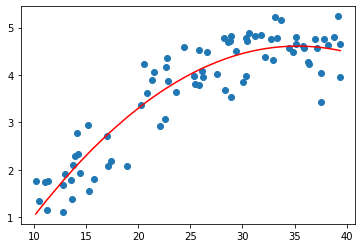

In [141]:
data1 = np.loadtxt('/content/drive/MyDrive/data1.txt')
X = data1[:,0].reshape(-1,1)
Y = data1[:,1].reshape(-1,1)

### START CODE HERE ###

# 对X 前面加1， 后面加平方，变为 m x 3 的矩阵
m = X.shape[0]   # m 是数据X的行数
X_square = np.power(X,2)
X = np.hstack((X,X_square))
X = preprocess_data(X)

# 用正规方程求解theta
theta = normal_equation(X, Y)

### END CODE HERE ###
plt.scatter(X[:,1],Y)
plt.plot(np.sort(X[:,1]),np.dot(X,theta)[np.argsort(X[:,1])],'r')

所有任务到这里就结束了，下面是对上面的数据进行任意多项式拟合的结果，你可以通过多次改变$K$的值来调整多项式的阶数来看看模型的效果(但不设的太大,$K \le 193$)。可以看到，越复杂的模型，虽然拟合数据效果很好，但是其泛化能力就会很差，所以模型应该要尽量简单。

/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1544: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


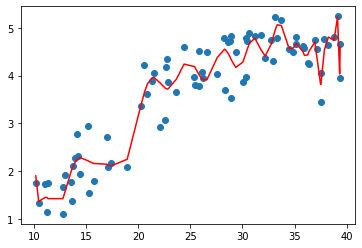

In [142]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

def PolynomialRegression(degree):
    return Pipeline([
        ("poly",PolynomialFeatures(degree=degree)),
        ("std_scaler",StandardScaler()),
        ("lin_reg",LinearRegression())    
    ])
X = data1[:,0].reshape(-1,1)
Y = data1[:,1].reshape(-1,1)
K = 193  #试试193(K<=193)

poly_reg = PolynomialRegression(degree=K)
poly_reg.fit(X,Y.squeeze())
y_predict = poly_reg.predict(X)
plt.scatter(X,Y)
plt.plot(np.sort(X[:,0]),y_predict[np.argsort(X[:,0])],color='r')